# Binary Classification Using Keras Deep Learning Library


# Data source: 
The data set is originally from the ISLR library, the current version was imported from Github. The college dataset has 777 observations and 18 variables.

# Attributes:
[Private] Whether the college is public or private

[Apps] Number of applications received

[Accept] Number of applications accepted

[Enroll] Number of new students enrolled

[Top10perc] Percentage of new students from top 10% of High School class

[Top25perc] Percentage new students from top 25% of High School class

[F.Undergrad] Number of fulltime undergraduates

[P.Undergrad] Number of parttime undergraduates

[Outstate] Out-of-state tuition

[Room.Board] Room and board costs

[Books] Estimated book costs

[Personal] Estimated personal spending

[PhD] Percentage of faculty with Ph.D.’s

[Terminal] Percentage of faculty with terminal degree

[S.F.Ratio] Student/faculty ratio

[perc.alumni] Pct. alumni who donate

[Expend] Instructional expenditure per student

[Grad.Rate] Graduation rate



In [3]:
# Importing required classes and functions for Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as k
from keras.models import Sequential
from keras import models
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler

Using TensorFlow backend.


In [4]:
# Importing required packages to load the dataset and to visualize  
# the data preprocessing tasks
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

In [5]:
# Loading the dataset
df=pd.read_csv('college.csv', header=0)

In [6]:
# Checking the fisrt row
df.head(5)

School Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F_Undergrad  P_Undergrad  Outstate  Room_Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S_F_Ratio  perc_alumni  Expend  Grad_Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [7]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   School       777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F_Undergrad  777 non-null    int64  
 8   P_Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room_Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S_F_Ratio    777 non-null    float64
 16  perc_alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad_Rate    777 non-null    int64  
dtypes: float

In [8]:
# Checking for missing data
df.isnull().sum()

School         0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F_Undergrad    0
P_Undergrad    0
Outstate       0
Room_Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S_F_Ratio      0
perc_alumni    0
Expend         0
Grad_Rate      0
dtype: int64

In [9]:

X = df.iloc[:,0:17]
Y = df.iloc[:,0]

In [10]:
# Dropping unnecessary column 
df=df.drop(['School'],axis=1)
df.head()

Private  Apps  Accept  Enroll  Top10perc  Top25perc  F_Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P_Undergrad  Outstate  Room_Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S_F_Ratio  perc_alumni  Expend  Grad_Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

In [11]:
# Summary statistics
pd.set_option('display.float_format', '{:.4}'.format)
df.describe()

Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
count     777.0     777.0     777.0      777.0      777.0        777.0   
mean  3.002e+03 2.019e+03     780.0      27.56       55.8      3.7e+03   
std    3.87e+03 2.451e+03     929.2      17.64       19.8     4.85e+03   
min        81.0      72.0      35.0        1.0        9.0        139.0   
25%       776.0     604.0     242.0       15.0       41.0        992.0   
50%   1.558e+03  1.11e+03     434.0       23.0       54.0    1.707e+03   
75%   3.624e+03 2.424e+03     902.0       35.0       69.0    4.005e+03   
max   4.809e+04 2.633e+04 6.392e+03       96.0      100.0    3.164e+04   

       P_Undergrad  Outstate  Room_Board    Books  Personal   PhD  Terminal  \
count        777.0     777.0       777.0    777.0     777.0 777.0     777.0   
mean         855.3 1.044e+04   4.358e+03    549.4 1.341e+03 72.66      79.7   
std      1.522e+03 4.023e+03   1.097e+03    165.1     677.1 16.33     14.72   
min            1.0  2.34e+03    1.78e+03     96.0     250.0   8.0      24.0   
25%           95.0  7.32e+03   3.597e+03    470.0     850.0  62.0      71.0   
50%          353.0  9.99e+03     4.2e+03    500.0   1.2e+03  75.0      82.0   
75%          967.0 1.292e+04    5.05e+03    600.0   1.7e+03  85.0      92.0   
max      2.184e+04  2.17e+04   8.124e+03 2.34e+03   6.8e+03 103.0     100.0   

       S_F_Ratio  perc_alumni    Expend  Grad_Rate  
count      777.0        777.0     777.0      777.0  
mean       14.09        22.74  9.66e+03      65.46  
std        3.958        12.39 5.222e+03      17.18  
min          2.5          0.0 3.186e+03       10.0  
25%         11.5         13.0 6.751e+03       53.0  
50%         13.6         21.0 8.377e+03       65.0  
75%         16.5         31.0 1.083e+04       78.0  
max         39.8         64.0 5.623e+04      118.0

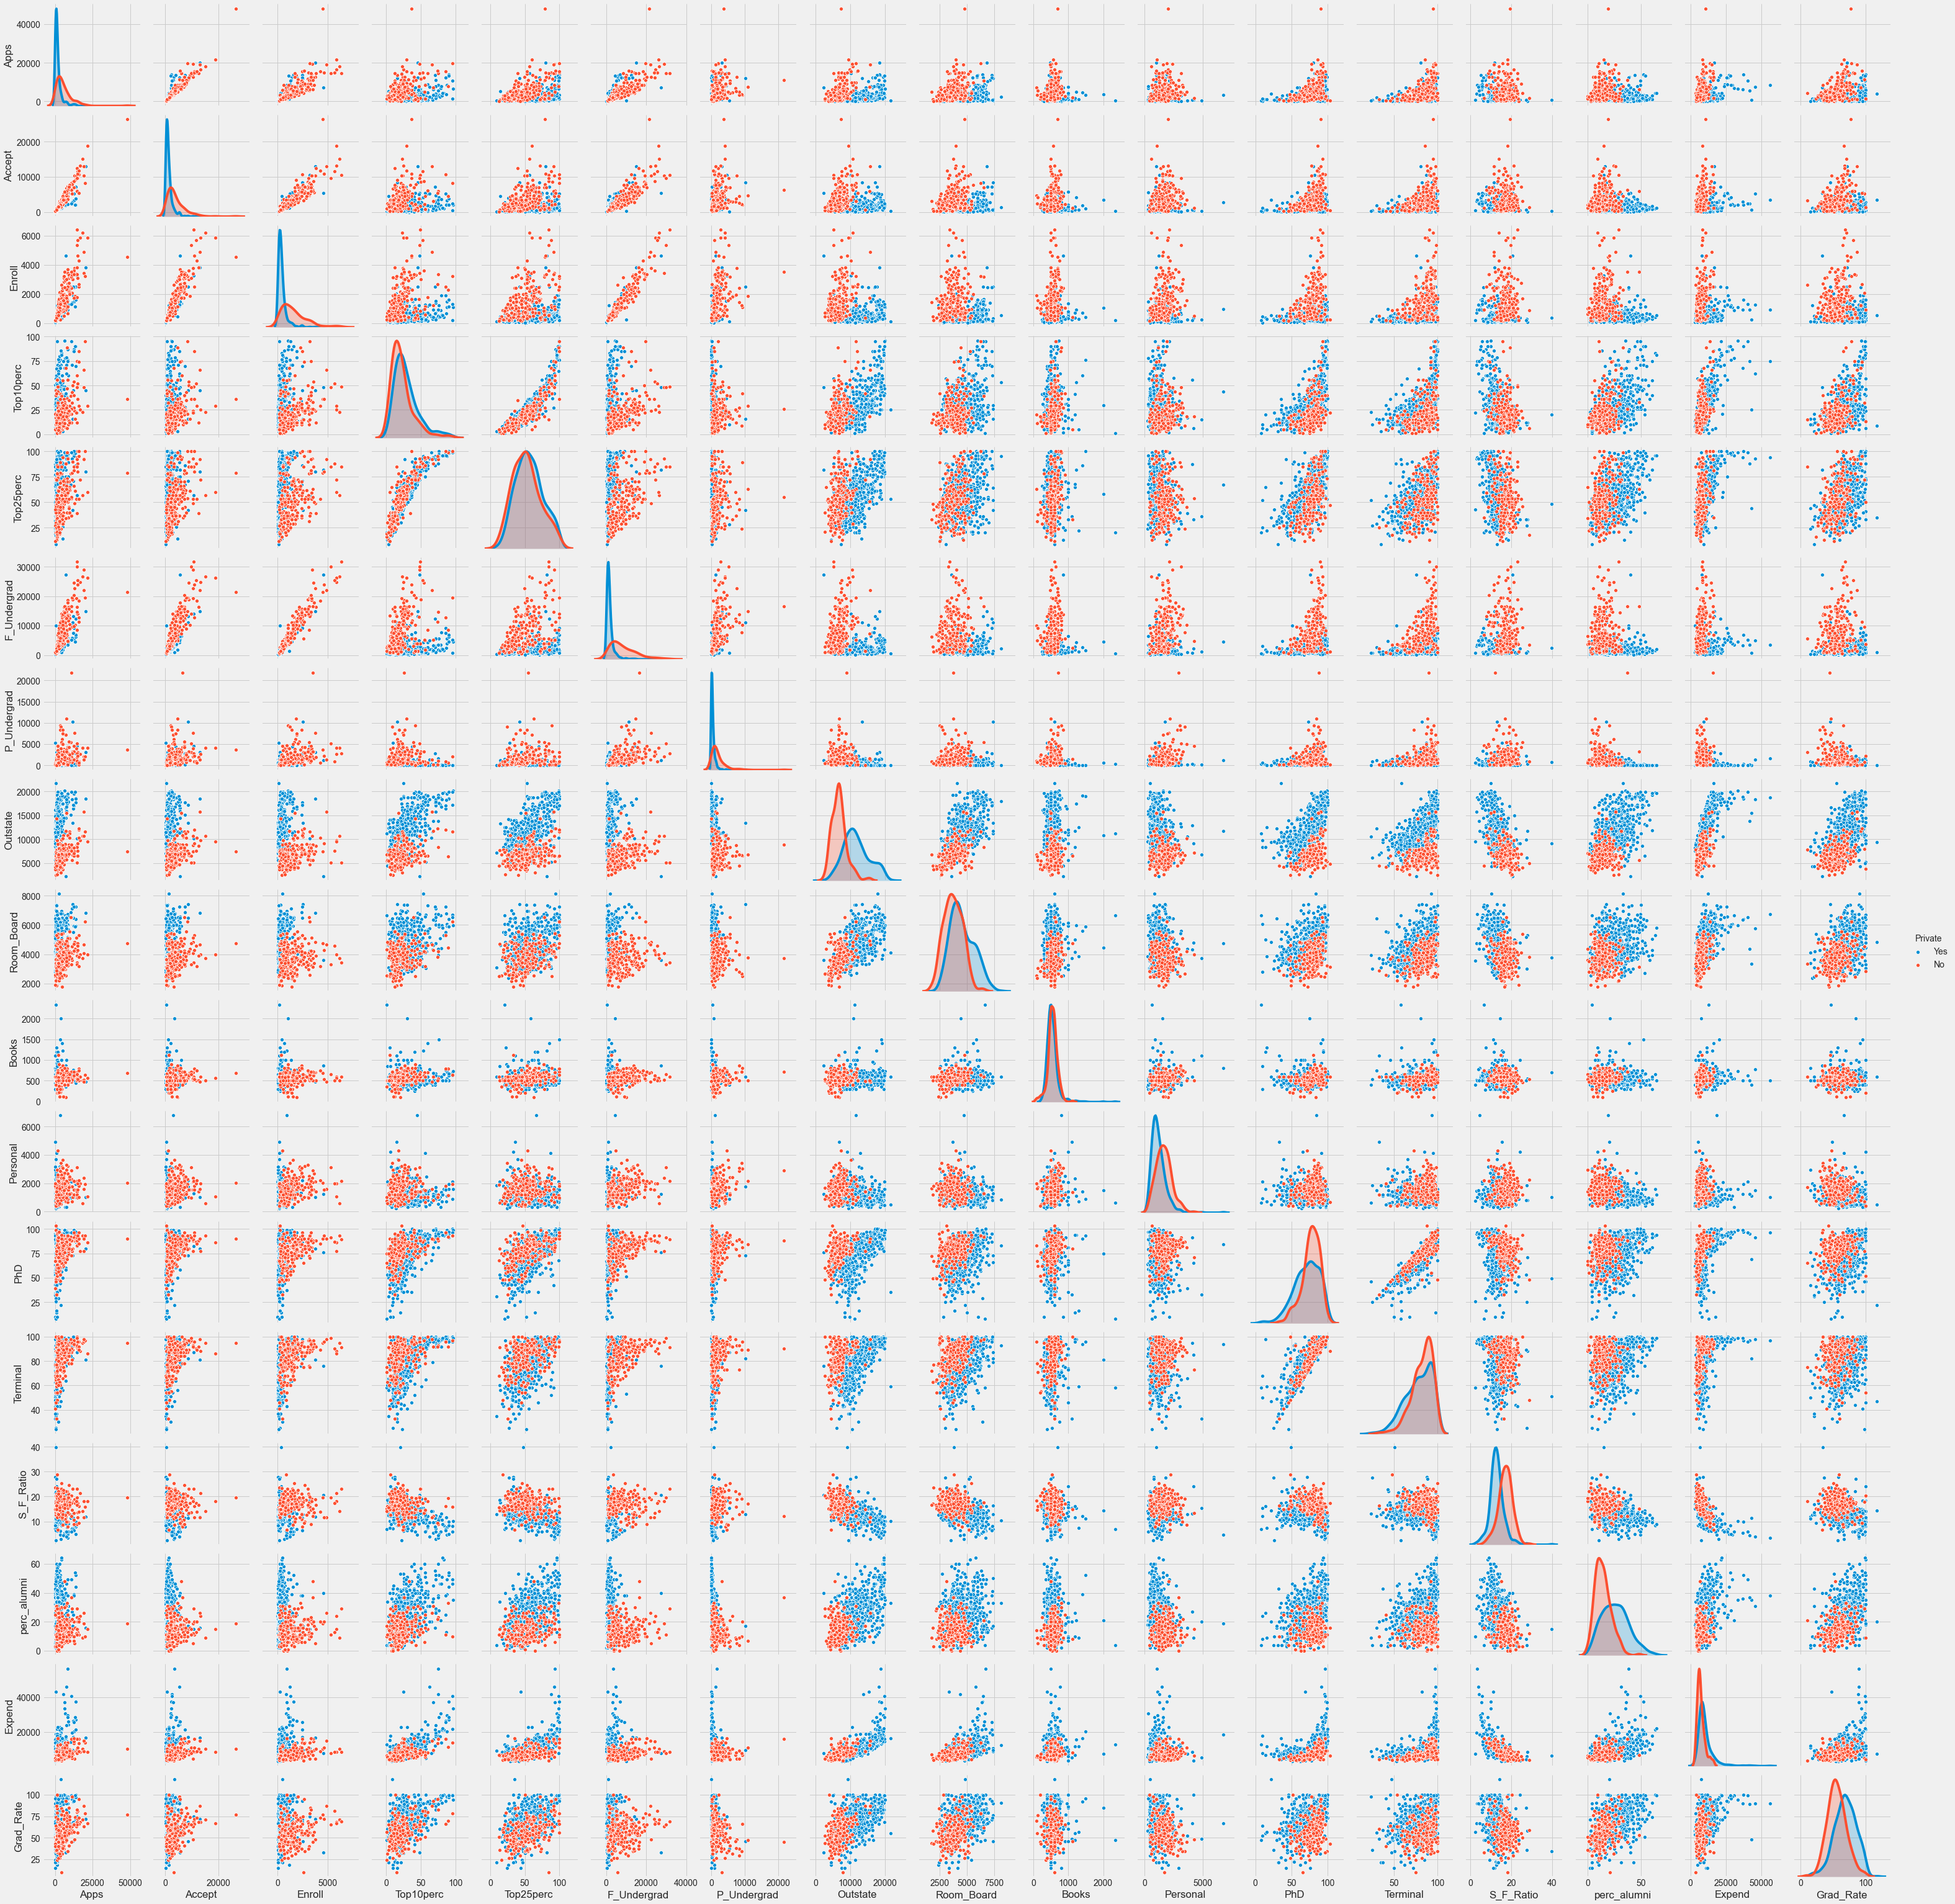

In [12]:
# Initial correlation check 
sns.pairplot(df, hue='Private')

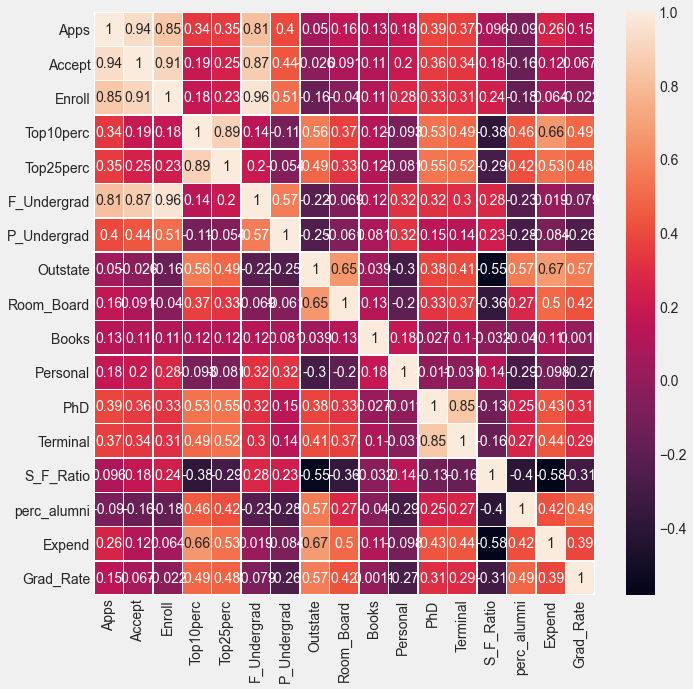

In [13]:
# A correlation plot with actual numerical values
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=.5, ax=ax)

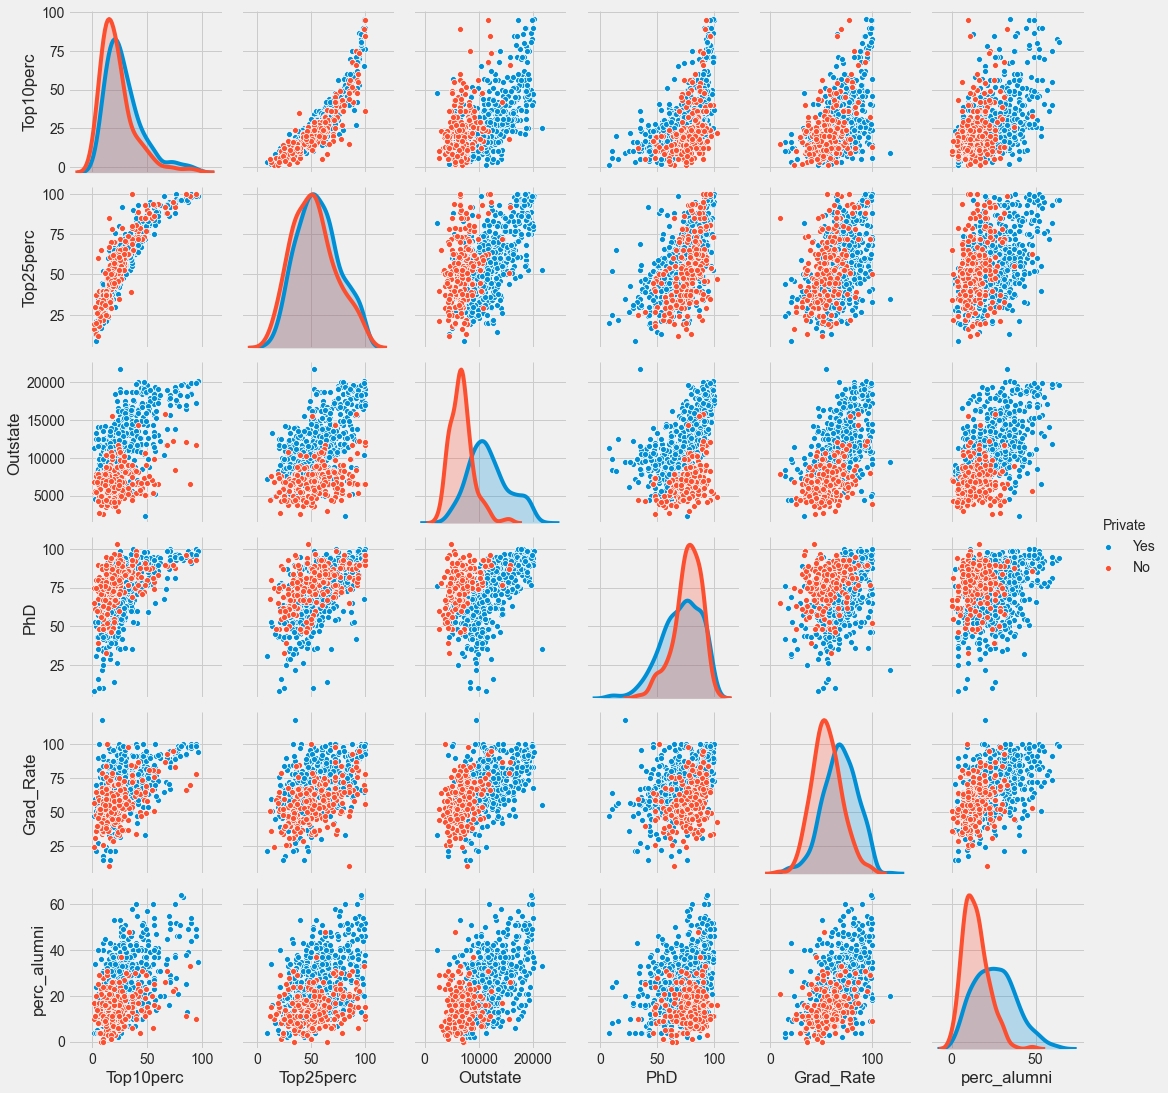

In [14]:
# Plotting a portio of the datasets 
sns.pairplot(df,vars=['Top10perc','Top25perc','Outstate','PhD',
                      'Grad_Rate','perc_alumni'], hue='Private')

<Figure size 864x864 with 0 Axes>

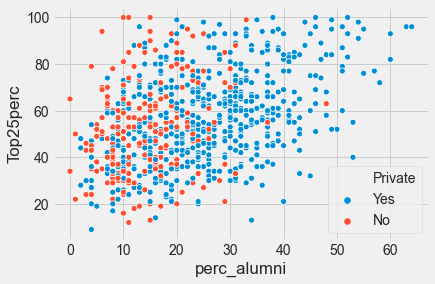

<Figure size 864x864 with 0 Axes>

In [15]:
# Visualizing the correlation between % alumni who
# donate to the school and % new students from top 25% of H.S. class
sns.scatterplot(x="perc_alumni", y="Top25perc", data=df, hue="Private")
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

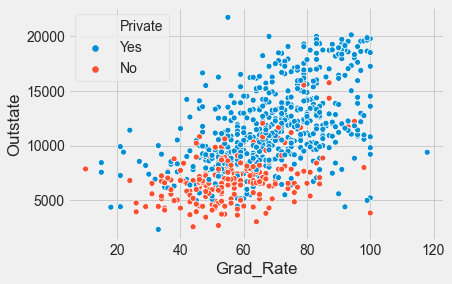

<Figure size 864x864 with 0 Axes>

In [16]:
# Correlation between out-of-state tuition and 
# % if fuculty with Ph.D.s  
sns.scatterplot(x=df["Grad_Rate"], y=df["Outstate"], data=df, hue="Private")
plt.figure(figsize=(12, 12))

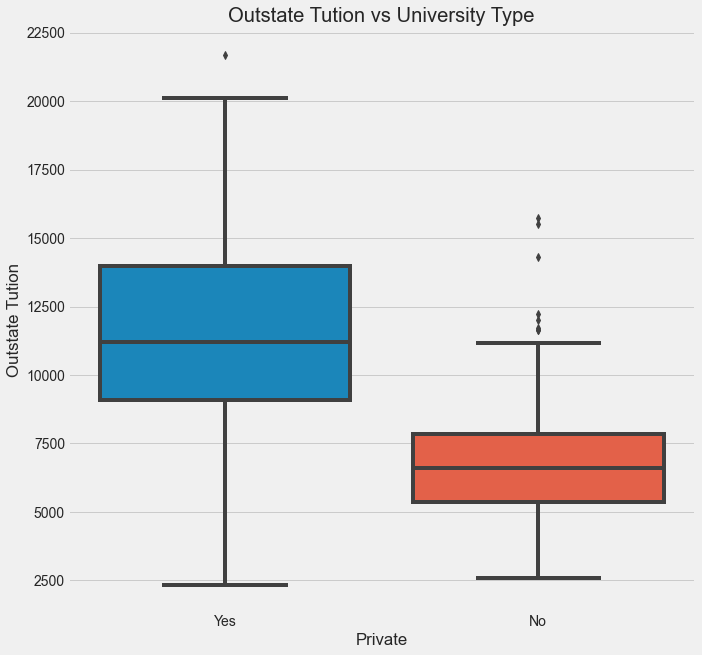

In [17]:
# Boxplot showing comparison of out-of-state tuition 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

sns.boxplot(y="Outstate", x="Private", data=df)
ax.set_xlabel('Private')
ax.set_ylabel('Outstate Tution')
ax.set_title('Outstate Tution vs University Type')
plt.show()

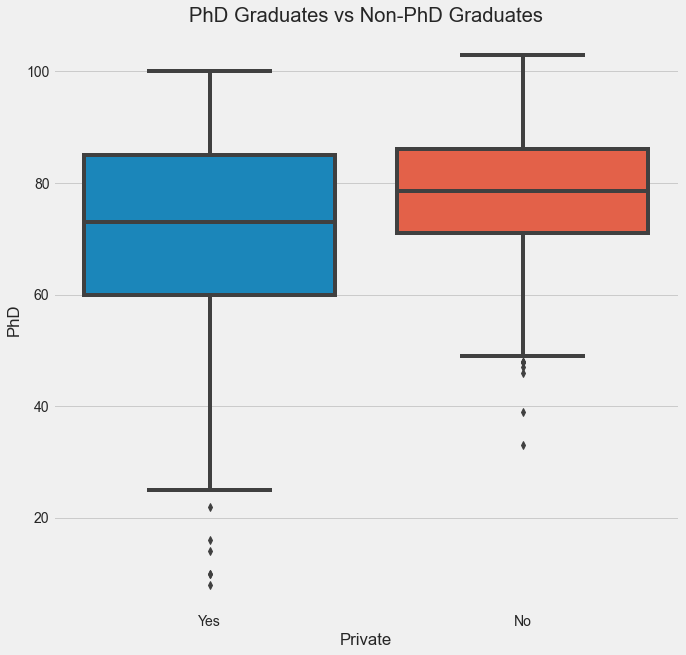

In [149]:
# Boxplot comparing % of faculty with Ph.D.s  
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

sns.boxplot(x="Private", y="PhD", data=df)
ax.set_xlabel('Private')
ax.set_ylabel('PhD')
ax.set_title('PhD Graduates vs Non-PhD Graduates')
plt.show()

In [287]:
# Transforming "Private" values which are strings into numerical values
df["Private"]=df["Private"].astype("category").cat.codes

In [288]:
df.head()

Private  Apps  Accept  Enroll  Top10perc  Top25perc  F_Undergrad  \
0        1  1660    1232     721         23         52         2885   
1        1  2186    1924     512         16         29         2683   
2        1  1428    1097     336         22         50         1036   
3        1   417     349     137         60         89          510   
4        1   193     146      55         16         44          249   

   P_Undergrad  Outstate  Room_Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S_F_Ratio  perc_alumni  Expend  Grad_Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

In [289]:
df.Private.value_counts()

1    565
0    212
Name: Private, dtype: int64

In [306]:
# Train and test data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)


In [307]:
# Creating the model and compile the Neural Network
def create_baseline():
    model=Sequential()
    model.add(Dense(60, input_dim=17, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model
   

In [308]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [309]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=100,batch_size=10)

Train on 621 samples, validate on 156 samples
Epoch 1/100
621/621 [==============================] - 0s 323us/step - loss: 196.5020 - accuracy: 0.7601 - val_loss: 56.4815 - val_accuracy: 0.8974
Epoch 2/100
621/621 [==============================] - 0s 161us/step - loss: 32.3041 - accuracy: 0.9002 - val_loss: 45.7249 - val_accuracy: 0.8397
Epoch 3/100
621/621 [==============================] - 0s 136us/step - loss: 19.5804 - accuracy: 0.8921 - val_loss: 27.4339 - val_accuracy: 0.8718
Epoch 4/100
621/621 [==============================] - 0s 136us/step - loss: 13.6670 - accuracy: 0.9163 - val_loss: 19.8695 - val_accuracy: 0.8654
Epoch 5/100
621/621 [==============================] - 0s 161us/step - loss: 11.4710 - accuracy: 0.9050 - val_loss: 22.8717 - val_accuracy: 0.8718
Epoch 6/100
621/621 [==============================] - 0s 187us/step - loss: 12.4141 - accuracy: 0.9130 - val_loss: 19.8704 - val_accuracy: 0.8141
Epoch 7/100
621/621 [==============================] - 0s 136us/step - 

In [312]:
# Compiling the NN to find out if adding more layers to 
# the network improves the performance
from sklearn.model_selection import StratifiedKFold
seed=100
numpy.random.seed(seed)
kfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cveval_model = []
for train, test in kfold.split(X,Y):
    model=Sequential()
    model.add(Dense(120, input_dim=17, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    

In [313]:
# Evaluating the model
eval_model=model.evaluate(X_train, Y_train)

print("%s: %.2f%%" % (model.metrics_names[1], eval_model[1]*100))
cveval_model.append(eval_model[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cveval_model), numpy.std(cveval_model)))

621/621 [==============================] - 0s 50us/step
accuracy: 77.78%
77.78% (+/- 0.00%)


In [314]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [315]:
# Looking at the confusion matrix below and the result from
# the evaluation we can confidently assume that the accuracy is 
# around 78% which is good. In other words this means, if the 
# prediction value is less than 0.5 then the prediction is 
# class = 0 = "No" otherwise the prediction is 
# class = 1 = "Yes". 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[  4  35]
 [  0 117]]


# Summary
The Baseline performed better in this case, we did get a marginal lift but more training, for example, by optimizing the algorithm and increasing the number of training epochs could produce better scores.
Overall the results of the score for the NN model was good.